In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

print(f'Tensorflow version: {tf.__version__}')

Tensorflow version: 2.9.2


# 1. Loading Data

In [5]:
# Google Colab 連線至雲端
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# 讀取資料: pd.read_csv('檔案路徑')
df=pd.read_csv('/content/drive/MyDrive/大三上/BCI/Train_data.csv')

In [7]:
# 觀察資料型態: df.head()
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,29.0,F,158.5,53.32,23.1,78.0,138.0,28.4,19.2,43.0,169.0,A
1,55.0,M,168.0,63.10,18.3,69.0,116.0,38.7,17.5,34.0,195.0,B
2,21.0,M,170.4,107.90,42.1,85.0,136.0,49.5,5.9,37.0,200.0,D
3,21.0,F,162.4,62.20,33.9,69.0,121.0,29.3,22.2,41.0,185.0,B
4,40.0,M,164.0,79.10,31.1,85.0,142.0,29.0,3.2,35.0,181.0,D


# 2 Data Preprocessing


In [8]:
# 觀察是否有缺失值: df.isnull().sum()
df.isnull().sum()

age                        2
gender                     0
height_cm                  1
weight_kg                  1
body fat_%                 3
diastolic                  4
systolic                   1
gripForce                  3
sit and bend forward_cm    2
sit-ups counts             6
broad jump_cm              4
class                      2
dtype: int64

In [9]:
# 移除缺失值: 
# 1. 找到缺失值的 index : 利用 df[特徵值欄位].isna() 以及 df[].index
# 2. df.drop(缺失值之 index)
# 觀察是否已移除所有缺失值: df.isnull().sum()
df.dropna(axis=0,how='any',inplace=True)
df.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

## 2.2 Feature Encoding: Gender Feature [M and F -> 1 and 0]

In [10]:
# 參考方法：使用 df.map()
# 觀察是否有將特徵值轉換成功
gender_mapping={'M':1,
        'F':0}
df['gender']=np.asarray(df['gender'].map(gender_mapping)).astype(np.int32)
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,29.0,0,158.5,53.32,23.1,78.0,138.0,28.4,19.2,43.0,169.0,A
1,55.0,1,168.0,63.10,18.3,69.0,116.0,38.7,17.5,34.0,195.0,B
2,21.0,1,170.4,107.90,42.1,85.0,136.0,49.5,5.9,37.0,200.0,D
3,21.0,0,162.4,62.20,33.9,69.0,121.0,29.3,22.2,41.0,185.0,B
4,40.0,1,164.0,79.10,31.1,85.0,142.0,29.0,3.2,35.0,181.0,D


## 2.3 Label Encoding: A B C D -> 0 1 2 3

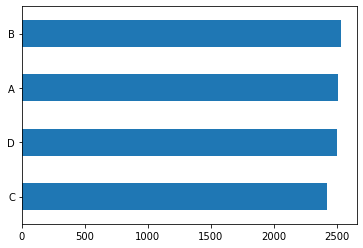

In [11]:
# 觀察每個類別的數量：df[].value_counts().plot()
df['class'].value_counts().sort_values().plot(kind = 'barh')

In [12]:
# 將原本資料的類別標籤轉成適當的資料型態
# 參考做法:
# 1. from sklearn.preprocessing import LabelEncoder
# 2. LabelEncoder() 的 fit_transform 轉換 df 類別標籤
from sklearn.preprocessing import LabelEncoder
class_mapping={'A':0,
        'B':1,
        'C':2,
        'D':3}
df['class']=np.asarray(df['class'].map(class_mapping)).astype(np.float32)
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,29.0,0,158.5,53.32,23.1,78.0,138.0,28.4,19.2,43.0,169.0,0.0
1,55.0,1,168.0,63.10,18.3,69.0,116.0,38.7,17.5,34.0,195.0,1.0
2,21.0,1,170.4,107.90,42.1,85.0,136.0,49.5,5.9,37.0,200.0,3.0
3,21.0,0,162.4,62.20,33.9,69.0,121.0,29.3,22.2,41.0,185.0,1.0
4,40.0,1,164.0,79.10,31.1,85.0,142.0,29.0,3.2,35.0,181.0,3.0


## 2.4 
1. Split input and output
2. Split train and validation data

In [13]:
# 1. df.iloc
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [14]:
# 2. train_test_split()
x_train, x_valid, y_train, y_valid = train_test_split(x, y, train_size=0.9, random_state=0)

## 2.5 Normalization

In [15]:
# 1. MinMax: from sklearn.preprocessing import MinMaxScaler
# 2. Z-score: from sklearn.preprocessing import StandardScaler
# Hint: fit_transform 和 transform 的不同
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train =scaler.fit_transform(x_train)
x_valid =scaler.transform(x_valid)

## 3. Machine Learning Model

In [16]:
# 團隊分工嘗試不同種分類器的結果（挑選幾種即可）
# For Example: 
# 1. Decision Tree
# 2. Random Forest 
# 3. k-NN
# 4. svm
# 5. gradient boosting classifier
# 6. Neural Network 

# 進階：對分類器使用 Cross Validation 以及 Hyperparameter Search

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForest
rf_model = RandomForestClassifier(n_estimators=2500,random_state=0,oob_score=True,n_jobs=-1,max_features='auto') #建立模型 設置參數
# Fit the training data
rf_modelfitting = rf_model.fit(x_train,y_train) #帶入資料

In [18]:
print(f'Accuracy on training set is { rf_modelfitting.score(x_train,y_train)}')
print(f'Accuracy on testing set is { rf_modelfitting.score(x_valid,y_valid)}')

Accuracy on training set is 1.0
Accuracy on testing set is 0.7362086258776329


## 4. Test data and CSV file

In [19]:
testset=pd.read_csv('/content/drive/MyDrive/大三上/BCI/Test_data.csv')

In [20]:
testset['gender']=np.asarray(testset['gender'].map(gender_mapping)).astype(np.int32)
x_test = scaler.transform(testset)
prediction = rf_model.predict(x_test)

In [21]:
test_label = pd.DataFrame()
test_label['data_id'] = np.arange(1,len(prediction)+1)
test_label['level'] = prediction
test_label = test_label.sort_values(by='data_id')

In [22]:
test_label['level'][test_label['level']==0] = 'A'
test_label['level'][test_label['level']==1] = 'B'
test_label['level'][test_label['level']==2] = 'C'
test_label['level'][test_label['level']==3] = 'D'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [23]:
# 將預測結果與 data_id 輸出成 submission.csv 的格式
# 參考作法：
# 1. pd.DataFrame()
# 2. dataframe 欄位值處理
# 3. 將 prediction 結果轉成 submission.csv 檔案內要求的型態
# 4. df.to_csv()
test_label.to_csv('submission.csv',index = False)